In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pulser
from pulser.devices import DigitalAnalogDevice, MockDevice
from pulser.register import Register

import sys
sys.path.append('../')

from source.qubo import anneal, plot_distribution, draw_solutions

The question is: If this is the Hamiltonian
$H(t) = \sum_i \frac{\hbar}{2} \Omega_i(t) \sigma_i^x - \sum_i \delta_i(t) \hbar \hat{n}_i + \sum_{j<i} \frac{C_6}{R_{ij}^6} \hat{n}_i \hat{n}_j$

and the first two terms come from the laser pulse, then how is the ground state not $|0\cdots 0\rangle$?
Once the laser is gone, there is only the last term left which has all positive coefficients, so $n_i=0\forall i$ would be the minimum engery.
First I thought it had to do with $\delta$, but that's only half the story.
- $\Omega(t)=0 \to \Omega_\text{max} \to 0$: In the end the transitions freeze out and not quantum dynamics happens any more
- $\delta(t)=\delta_\text{init} < 0 \to 0 \to \delta_\text{final} > 0$

Let's first draw some nice plots for a quantum wire of length 4:

Note: One more point: In those quantum wires, actually the detuning on the inner atoms (all except the two outer most ones) should be double what the outer atoms have.

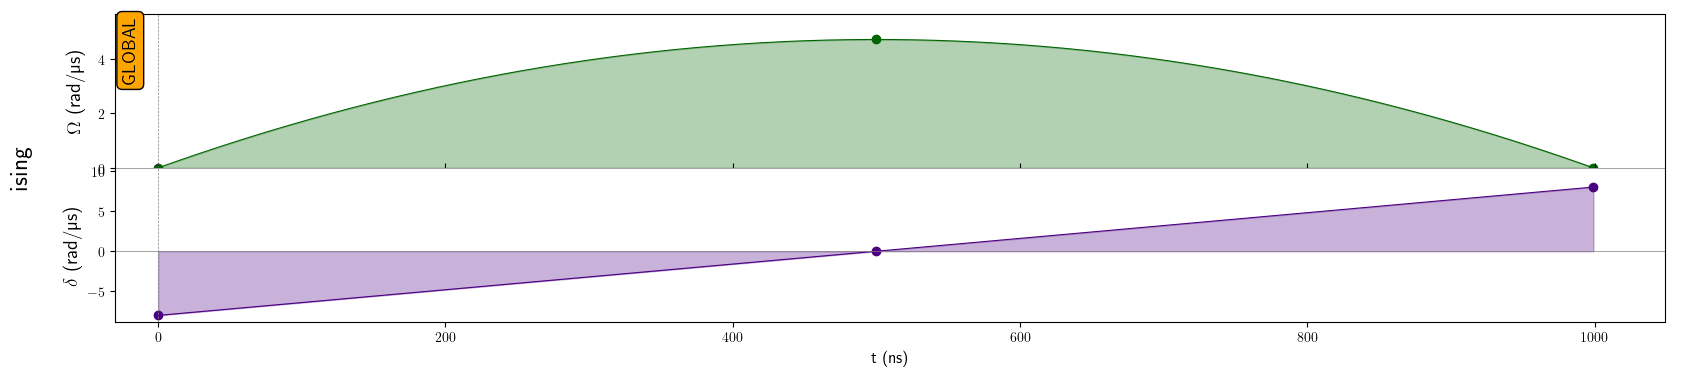

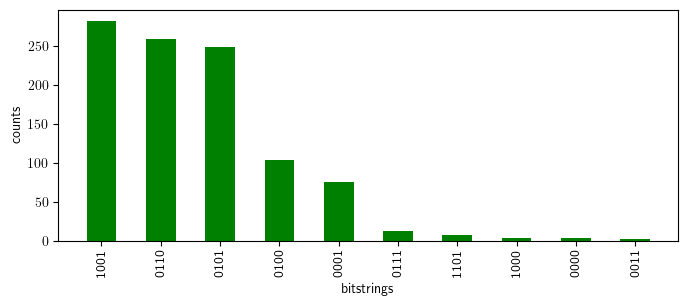

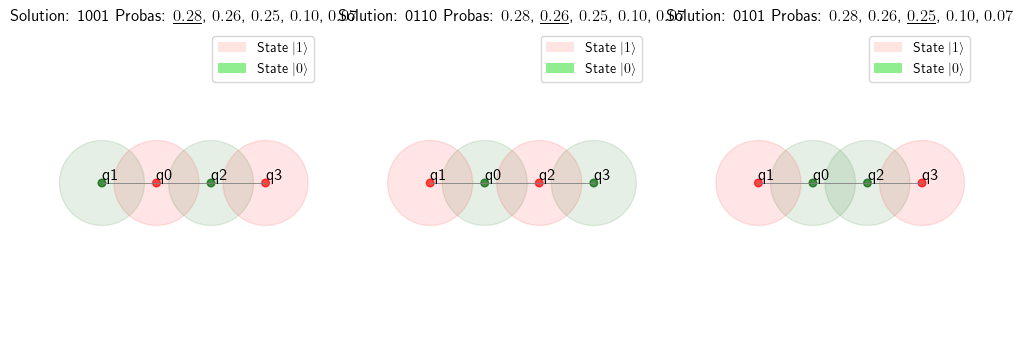

In [2]:
from matplotlib.patches import Patch
from matplotlib import rc

rc('text', usetex=True)

dx = 8.5
coords = [
    [-0, 0], 
    [-dx, 0], 
    [dx, 0],
    [2*dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -8
delta_f = -delta_i
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, draw_pulse=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

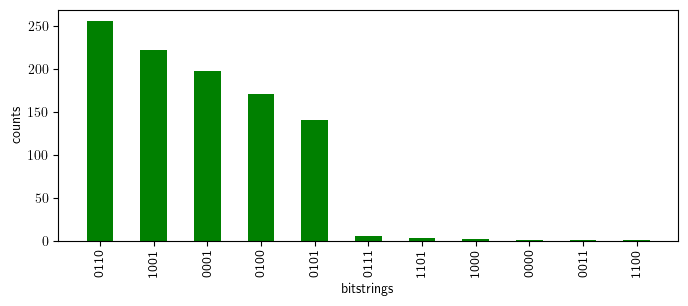

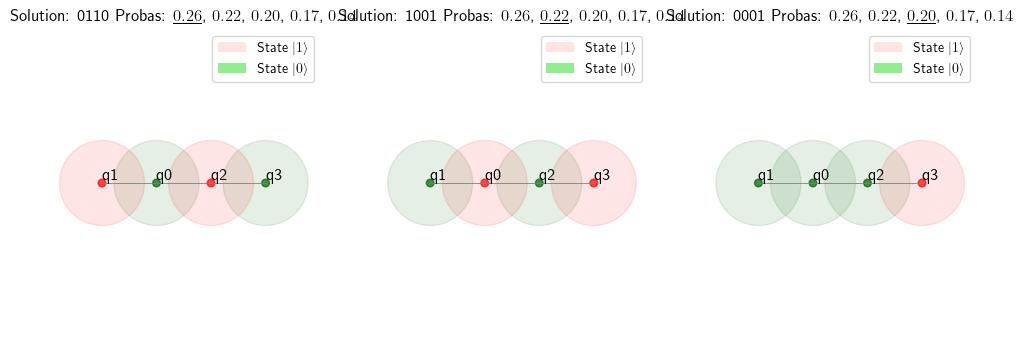

In [3]:
# smaller detuning (delta)

dx = 8.5
coords = [
    [-0, 0], 
    [-dx, 0], 
    [dx, 0],
    [2*dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -5
delta_f = -delta_i
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

Now let's simplify the problem and only go to length 2, i.e. two atoms in each others Rydberg radius.
Note that here the half radius is drawn, so as soon as the two balls touch, they are within each others Rydberg radius.

/home/mlpc/miniconda3/envs/Pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


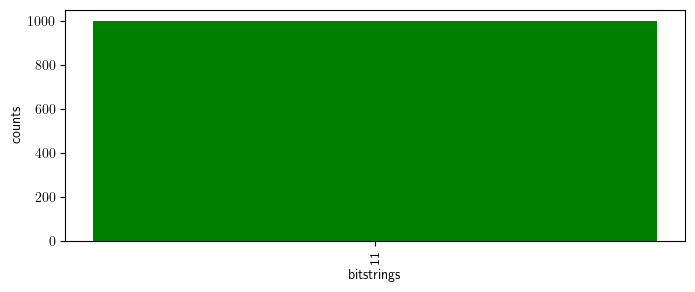

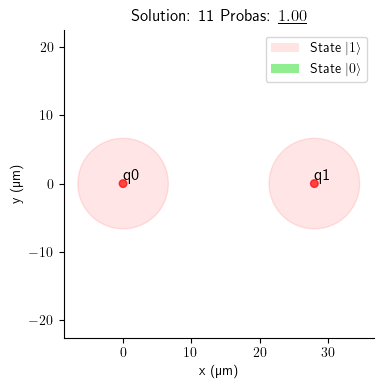

In [4]:
coords = [
    [-0, 0], 
    # [-9, 0], 
    # [9, 0],
    [28, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -0
delta_f = 0
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=1, draw_graph=True)

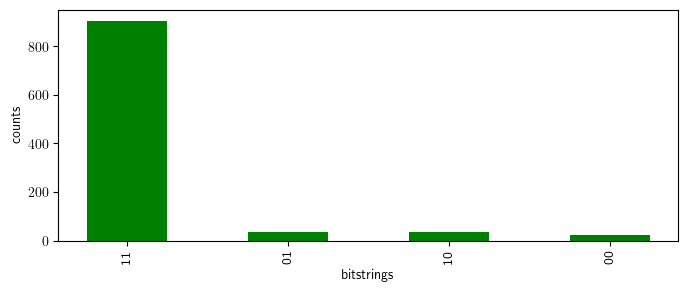

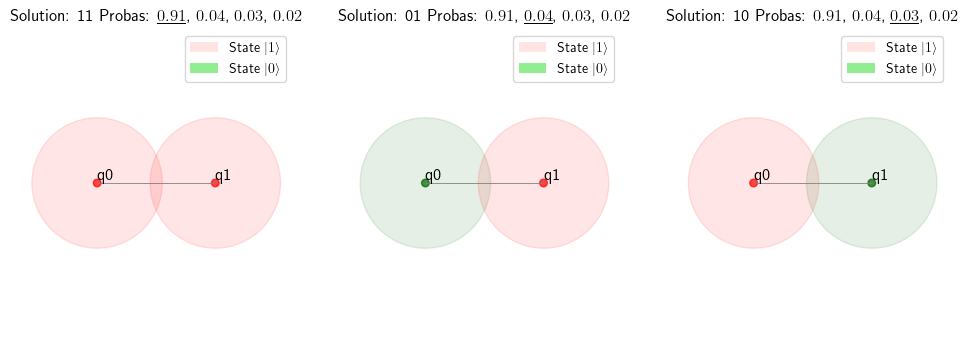

In [5]:
coords = [
    [-0, 0], 
    # [-9, 0], 
    # [9, 0],
    [12, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -0
delta_f = 0
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

/home/mlpc/miniconda3/envs/Pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


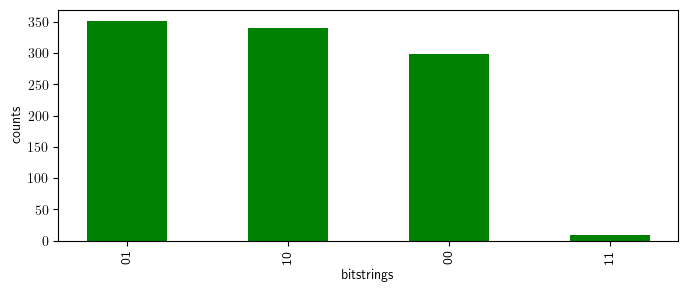

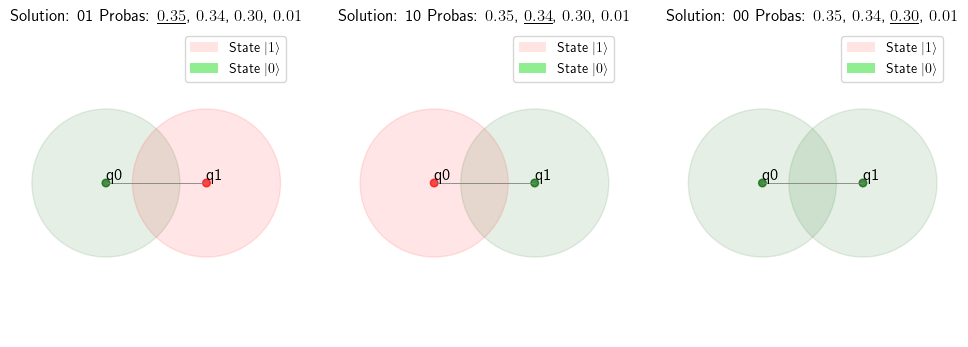

In [6]:
coords = [
    [-0, 0], 
    # [-9, 0], 
    [9, 0],
    # [18, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -0
delta_f = 0
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

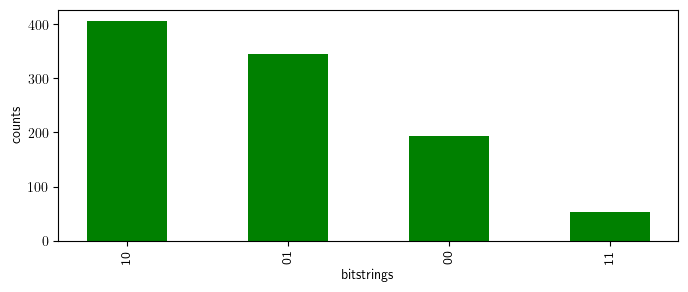

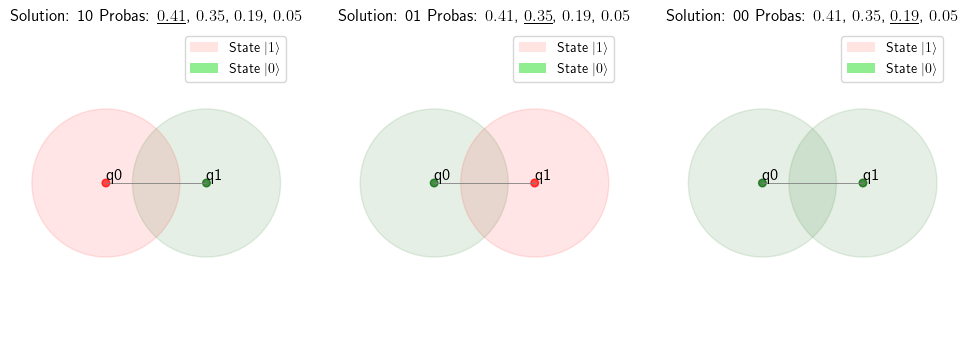

In [7]:
coords = [
    [-0, 0], 
    # [-9, 0], 
    [9, 0],
    # [18, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -5
delta_f = 5
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

/home/mlpc/miniconda3/envs/Pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


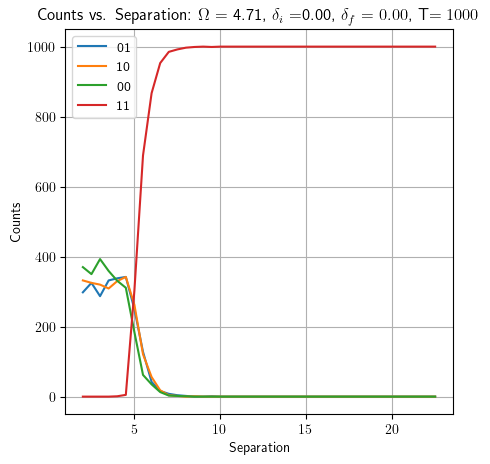

In [8]:
separations = np.arange(2, 23, 0.5)
results = {}

Omega = 1.5 * np.pi # gives approximately pi as area under the pulse
delta_i = -0
delta_f = 0
T = 1000

for separation in separations:
    coords = [[-separation, 0], [separation, 0]]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)
    
    counts: dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T)  # dict of counts
    results[separation] = counts

# plot
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(results.keys(), [c["01"] for c in [results[s] for s in results.keys()]], label="01")
plt.plot(results.keys(), [c["10"] for c in [results[s] for s in results.keys()]], label="10")
plt.plot(results.keys(), [c["00"] for c in [results[s] for s in results.keys()]], label="00")
plt.plot(results.keys(), [c["11"] for c in [results[s] for s in results.keys()]], label="11")
plt.legend()
plt.xlabel("Separation")
plt.ylabel("Counts")
plt.title(r"Counts vs. Separation: $\Omega$ = " + f"{Omega:.2f}" + r", $\delta_i$ =" + f"{delta_i:.2f}" + r", $\delta_f$ = " + f"${delta_f:.2f}$, T$ = {T}$")
plt.grid()
plt.show()

In [14]:
def exp1(Omega, delta_i, delta_f, T, separations):
    for separation in separations:
        coords = [[-separation, 0], [separation, 0]]
        qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
        reg = Register(qubits)
        
        counts: dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T)  # dict of counts
        results[separation] = counts

    # plot
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.plot(results.keys(), [c["01"] for c in [results[s] for s in results.keys()]], label="01")
    plt.plot(results.keys(), [c["10"] for c in [results[s] for s in results.keys()]], label="10")
    plt.plot(results.keys(), [c["00"] for c in [results[s] for s in results.keys()]], label="00")
    plt.plot(results.keys(), [c["11"] for c in [results[s] for s in results.keys()]], label="11")
    plt.legend()
    plt.xlabel("Separation")
    plt.ylabel("Counts")
    plt.title(r"Counts vs. Separation: $\Omega$ = " + f"{Omega:.2f}" + r", $\delta_i$ =" + f"{delta_i:.2f}" + r", $\delta_f$ = " + f"${delta_f:.2f}$, T$ = {T}$")
    plt.grid()
    plt.show()

/home/mlpc/miniconda3/envs/Pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


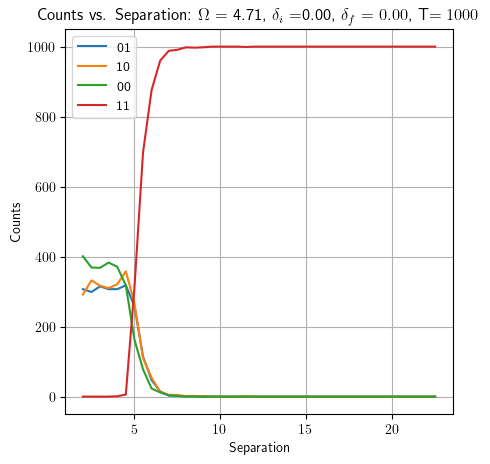

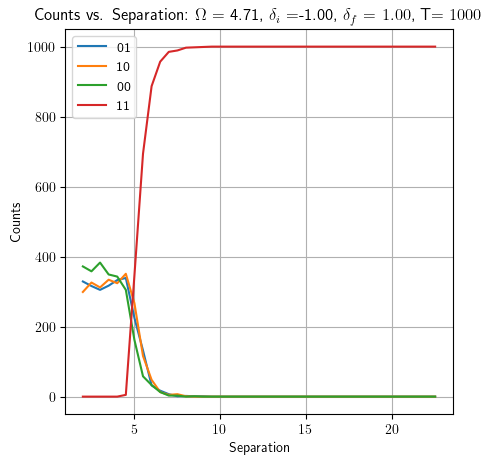

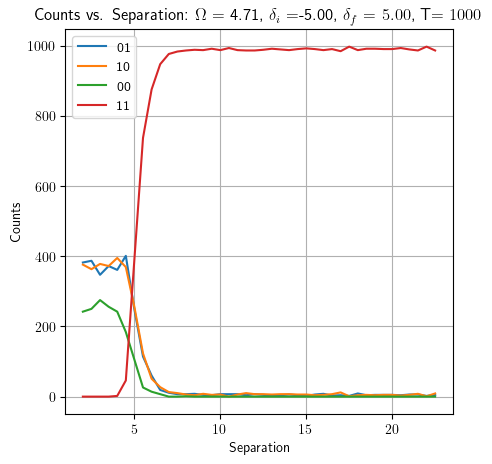

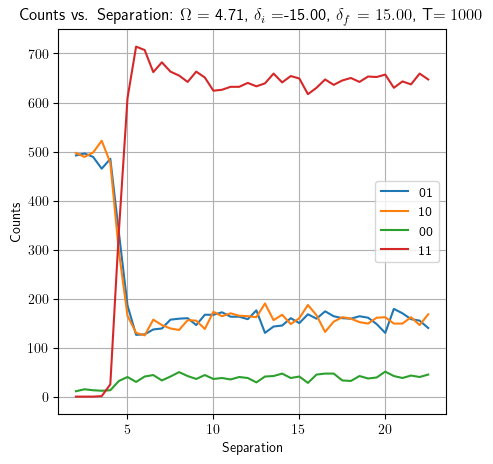

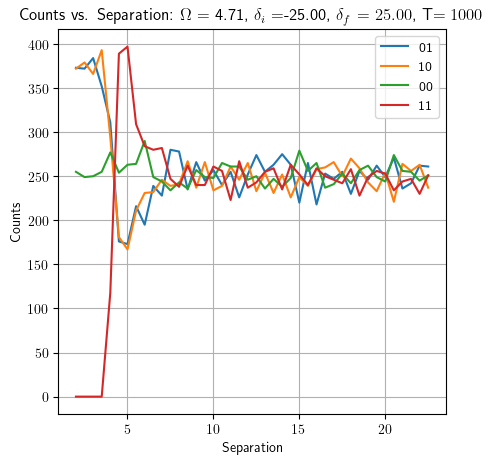

In [16]:
separations = np.arange(2, 23, 0.5)
results = {}

Omega = 1.5 * np.pi # gives approximately pi as area under the pulse
delta_i = -1
delta_f = 1
T = 1000

exp1(Omega, 0, 0, T, separations)
exp1(Omega, -1, 1, T, separations)
exp1(Omega, -5, 5, T, separations)
exp1(Omega, -15, 15, T, separations)
exp1(Omega, -25, 25, T, separations)

We see that the probability of $|01\rangle$ and $|10\rangle$ increases if the atoms get closer.
So the whole thing is simply a Rydberg Blockade effect:

- if the atoms are far apart, they don't see each other. Each atom gets excited and we get $|11\rangle$ as intermediate state and then the atoms return to the ground state.
- if they are close, the state $|11\rangle$ is strongly suppressed and we don't get it. We get $(\alpha |10\rangle + \beta |01\rangle + \gamma |00\rangle)$ as intermediate state and when the laser is turned off, this state stays, because it has energy zero since $n_0 n_1 = 0$ for both of them.

# With Local Detuning
https://pulser.readthedocs.io/en/stable/tutorials/dmm.html

(work in progress)

In [22]:
import numpy as np

from dataclasses import replace

from matplotlib import pyplot as plt

from pulser.channels.dmm import DMM
from pulser.devices import AnalogDevice
from pulser.register import Register
from pulser.register.register_layout import RegisterLayout
from pulser.register.mappable_reg import MappableRegister
from pulser.register.weight_maps import DetuningMap
from pulser.sampler import sampler
from pulser.sequence import Sequence
from pulser.pulse import Pulse
from pulser.waveforms import ConstantWaveform, RampWaveform

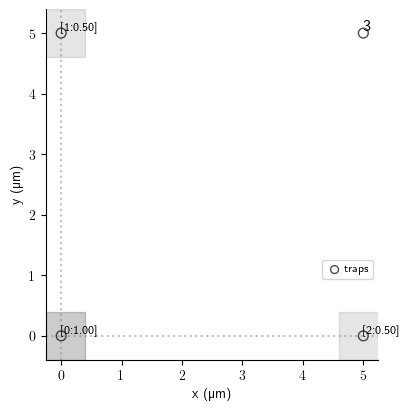

In [24]:
trap_coordinates = [(0.0, 0.0), (0.0, 5.0), (5.0, 0.0), (5.0, 5.0)]
weights_1 = [1.0, 0.5, 0.5, 0]  # between 0 and 1
weights_2 = [1.0, 1.0, 1.0, 0]  # between 0 and 1

register_layout = RegisterLayout(trap_coordinates)
detuning_map = register_layout.define_detuning_map(
    {i: weights_1[i] for i in range(4)}  # mapping between trap ids and weights
)

map_reg = MappableRegister(register_layout)
det_map_from_map_reg = map_reg.define_detuning_map(
    {i: weights_1[i] for i in range(4)}  # mapping between trap ids and weights
)

register = Register.from_coordinates(
    trap_coordinates, center=False, prefix="q"
)
det_map_from_reg = register.define_detuning_map(
    {
        f"q{i}": weights_1[i] for i in range(4)
    }  # mapping between qubit ids and weights
)

detuning_map.draw(labels=[0, 1, 2, 3])
assert detuning_map == det_map_from_map_reg
assert detuning_map == det_map_from_reg

In [26]:
dmm = DMM(
    clock_period=4,
    min_duration=16,
    max_duration=2**26,
    mod_bandwidth=8,
    bottom_detuning=-2 * np.pi * 20,  # detuning between 0 and -20 MHz
    total_bottom_detuning=-2 * np.pi * 2000,  # total detuning
)
mock_device = replace(
    AnalogDevice.to_virtual(),
    dmm_objects=(dmm, DMM()),
    reusable_channels=True,
)
print(mock_device.dmm_channels)

{'dmm_0': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=None, propagation_dir=None, bottom_detuning=-125.66370614359172, total_bottom_detuning=-12566.370614359172), 'dmm_1': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=1, min_duration=1, max_duration=100000000, min_avg_amp=0, mod_bandwidth=None, custom_phase_jump_time=None, eom_config=None, propagation_dir=None, bottom_detuning=None, total_bottom_detuning=None)}
